# SciPy.stats

`SciPy`（サイパイ）は，NumPyの大幅な拡張版と理解して良い。`SciPy`を読み込むとNumPyの関数などを利用できるようになる。しかし`SciPy`は大きなパッケージであり，全てを読み込む必要もない。従って，`NumPy`を読み込んで，`SciPy`のサブパッケージや関数を読み込むということで十分であろう。ここでは`SciPy`の`stats`というサブパッケージについて説明する。

## 正規分布（Normal Distribution）

正規分布のモジュール名は`norm`であり，以下が主な関数である。

1. 確率密度関数： `norm.pdf(x, loc=0, scale=1)`
    * `pdf`はProbability Density Functionの頭文字
    * `loc` = 平均
    * `scale` = 標準偏差
    * `x` = $-\infty$から$\infty$の間の値
    * 返り値：`x`の値が発生する確率（％）
    * `loc`と`scale`を省略すると標準正規分布の確率密度関数となる。


2. 累積分布関数： `norm.cdf(x, loc=0, scale=1)`
    * `cdf`はCumulative Distribution Functionの頭文字
    * `loc` = 平均
    * `scale` = 標準偏差
    * `x` = $-\infty$から$\infty$の間の値
    * 返り値：`x`**以下**の値が発生する確率（％）
    * `loc`と`scale`を省略すると標準正規分布の累積分布関数となる。


3. パーセント・ポイント関数： `norm.ppf(a, loc=0, scale=1)`
    * `ppf`はPercent Point Functionの頭文字
    * `loc` = 平均
    * `scale` = 標準偏差
    * `a` = 0 ~ 1の間の値
    * 返り値：累積分布関数の値が`a`である場合の`x`の値（累積分布関数の逆関数）
    * `loc`と`scale`を省略すると標準正規分布のパーセント・ポイント関数となる。


4. ランダム変数生成関数： `norm.rvs(loc=0, scale=1, size=1)`
    * `rvs`はRandom VariableSの大文字の部分
    * `loc` = 平均
    * `scale` = 標準偏差
    * `size` = 生成されるランダム変数の数
    * 返り値：正規分布に従って発生したランダム変数
    * `loc`と`scale`を省略すると標準正規分布のランダム変数生成関数となる。


`scipy.stats`の`norm`，`NumPy`，`matplotlib.pyplot`を読み込む。

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

**確率密度関数**

In [2]:
norm.pdf(0)

0.3989422804014327

`0`が発生する確率は約`39.9%`とわかる。`norm.pdf(x)`のグラフを描くためには，$\infty$から$\infty$の`x`の返り値が必要になるが，ここでは`-4`から`4`の区間で100個の`x`の値で近似する。

In [3]:
x = np.linspace(-4, 4, 100)

この`x`を直接`norm.pdf()`に代入すると，全ての`x`の値に対しての返り値を得ることができる。それを`y_pdf`に割り当てる。

In [4]:
y_pdf = norm.pdf(x)  # 標準正規分布

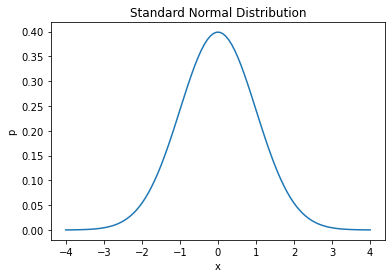

In [5]:
plt.plot(x,y_pdf)
plt.xlabel('x')
plt.ylabel('p')
plt.title('Standard Normal Distribution')
pass

**累積分布関数**

In [6]:
y_cdf = norm.cdf(x)  # 標準正規分布

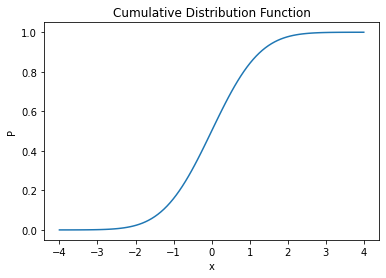

In [7]:
plt.plot(x, y_cdf)
plt.xlabel('x')
plt.ylabel('P')
plt.title('Cumulative Distribution Function')
pass

この関数を使うことにより，`x`の値が$X$の時，それ以下の値が発生する確率は何％かを計算できる。例えば，`x`が$0$以下の値を取る確率は

In [8]:
norm.cdf(0)

0.5

確率密度関数が平均$0$（`loc=0`）を中心に左右対称のため確率は50%となる。では，`x`が$-4$以下の場合は？

In [9]:
norm.cdf(-4)

3.167124183311986e-05

返り値の最後の`e-05`は$\times 10^5$という意味。では，`x`が４**以上**の確率は？

In [10]:
1-norm.cdf(4)

3.167124183311998e-05

**パーセント・ポイント関数**

In [11]:
a = np.linspace(0,1,100)
y_ppf = norm.ppf(a)  # 標準正規分布

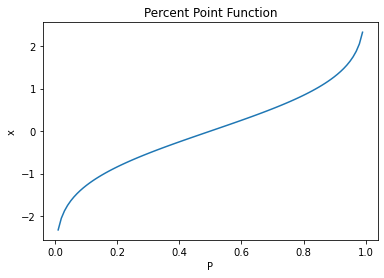

In [12]:
plt.plot(a,y_ppf)
plt.xlabel('P')
plt.ylabel('x')
plt.title('Percent Point Function')
pass

パーセント・ポイント関数を使い，累積分布関数の値が`P`である場合の`x`の値を計算できる。`P=0.5`の場合の`x`は？

In [13]:
norm.ppf(0.5)

0.0

`P=0.025`の場合の`x`は？

In [14]:
norm.ppf(0.025)

-1.9599639845400545

`P=0.975`の場合の`x`は？

In [15]:
norm.ppf(0.975)

1.959963984540054

**ランダム変数生成関数**

10000個のランダム変数を生成しよう。

In [16]:
y_rvs = norm.rvs(size=10000)  # 標準正規分布

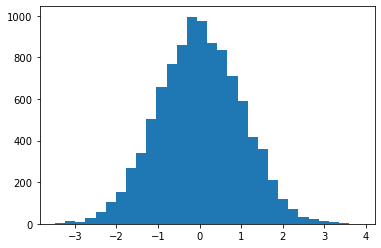

In [17]:
plt.hist(y_rvs, bins=30)  #  bins=表示する棒の数（デフォルトは10)
pass

`y_rvs`は標準正規分布から生成されたが，`y_rvs`がどの分布関数から生成されたか不明だったとしよう。更に，`y_rvs`から元の確率密度関数を推定したいとしよう。その際に使う手法をカーネル密度推定と呼ぶ。`SciPy`にはそのための関数`gaussian_kde`が用意されている。`gaussian`（ガウシアン）とは天才数学者ガウスの名前からきており「ガウス的な」と理解すれば良い。`kde`はKernel Density Estimate（カーネル密度推定）の頭文字をとっている。

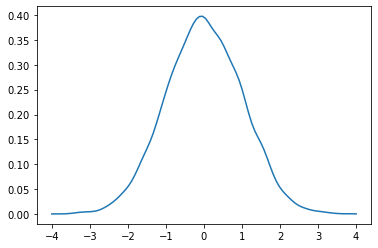

In [18]:
from scipy.stats import gaussian_kde  # サブパッケージを読み込む
kde = gaussian_kde(y_rvs)  # y_rvsから確率密度関数を推定
plt.plot(x, kde(x))        # 横軸のxに対してプロット
pass

推定なので標準正規分布の確率密度関数と全く同じにはならないが，非常に近い。上の図と重ねると。

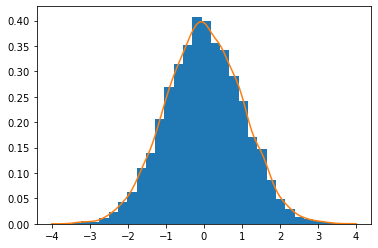

In [19]:
plt.hist(y_rvs, bins=30, density=True)
plt.plot(x, kde(x))
pass

`plt.hist()`にある`density=True`は縦軸を％表示にする引数である。これにより`plt.hist`のヒストグラムと`plt.plot()`のカーネル密度関数が同じスケールで表示されることになる。

## その他の分布関数

### $t$分布

$t$分布のモジュール名は`t`。
```
t.pdf(x, df)
t.cdf(x, df)
t.ppf(a, df)
t.rvs(df, size=1)
```
* `dfn`：自由度（degree of freedom）

`scipy.stats`の`t`を読み込み確率密度関数の図を表示する。

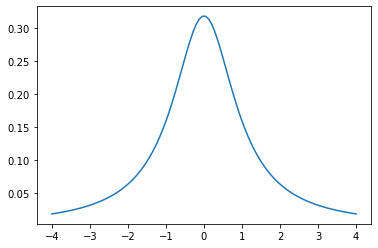

In [20]:
from scipy.stats import t
x = np.linspace(-4,4,100)
y = t.pdf(x, df=1)
plt.plot(x,y)
pass

`df=1`の場合に`x`の値が`-3`以下の確率は何か？

In [21]:
t.cdf(-3, df=1)

0.10241638234956672

`df=1`の場合に`x`の値が`3`以上の確率は何か？

In [22]:
1-t.cdf(3, df=1)

0.10241638234956674

### $\chi^2$分布

$\chi^2$分布のモジュール名は`chi2`。
```
chi2.pdf(x, df)
chi2.cdf(x, df)
chi2.ppf(a, df)
chi2.rvs(df, size=1)
```
* `df`：自由度（degree of freedom）

`scipy.stats`の`chi2`を読み込み確率密度関数の図を表示する。

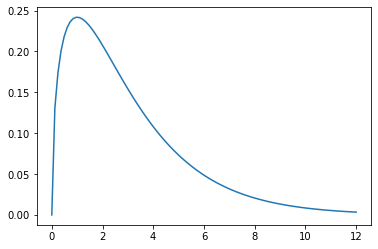

In [23]:
from scipy.stats import chi2
x = np.linspace(0,12,100)
y = chi2.pdf(x, df=3)
plt.plot(x,y)
pass

`df=3`の場合に`x`の値が`1`以下の確率は何か？

In [24]:
chi2.cdf(1, df=3)

0.19874804309879915

`df=3`の場合に`x`の値が`10`以上の確率は何か？

In [25]:
1-chi2.cdf(10, df=3)

0.0185661354630432

### $F$分布

$F$分布のモジュール名は`f`。
```
f.pdf(x, dfn, dfd)
f.cdf(x, dfn, dfd)
f.ppf(a, dfn, dfd)
f.rvs(dfn, dfd, size=1)
```
* `dfn`：分子の自由度（numerator degree of freedom）
* `dfd`：分母自由度（denominator degree of freedom）

`scipy.stats`の`f`を読み込み確率密度関数の図を表示する。

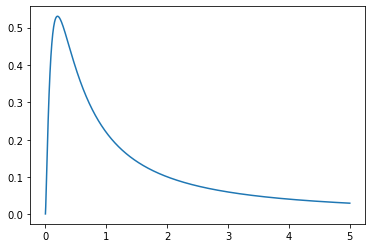

In [26]:
from scipy.stats import f
x = np.linspace(0.001,5,1000)
y = f.pdf(x, dfn=5, dfd=1)
plt.plot(x,y)
pass

`dfn=5`, `dfd=1の場合に`x`の値が`0.1`以下の確率は何か？

In [27]:
f.cdf(0.1, dfn=5, dfd=1)

0.02503101581845294

`dfn=5`, `dfd=1の場合に`x`の値が`5`以上の確率は何か？

In [28]:
1-f.cdf(5, dfn=5, dfd=1)

0.32657156446244606

### 一様分布 (Uniform Distribution)

一様分布のモジュール名は`uniform`。
```
uniform.pdf(x, loc=0, scale=1)
uniform.cdf(x, loc=0, scale=1)
uniform.ppf(a, loc=0, scale=1)
uniform.rvs(loc=0, scale=1, size=1)
```
* `loc`：`x`の最小値
* `scale`：`x`の幅
    * `x`の最大値：`loc+scale`
* `m`だけ「右」に平行移動させる場合は
```
loc=m   # scaleは省略
```

`scipy.stats`の`uniform`を読み込み確率密度関数の図を表示する。

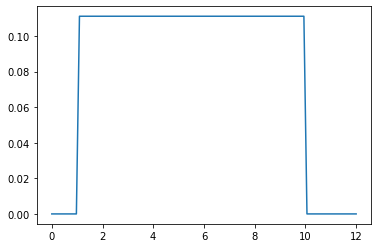

In [29]:
from scipy.stats import uniform
x = np.linspace(0,12,100)
y = uniform.pdf(x, loc=1, scale=9)
plt.plot(x,y)
pass

### ロジスティク分布（Logistic Distribution）

ロジスティック分布のモジュール名は`logistic`。
```
logistic.pdf(x, loc=0, scale=1)
logistic.cdf(x, loc=0, scale=1)
logistic.ppf(a, loc=0, scale=1)
logistic.rvs(loc=0, scale=1, size=1)
```
* `loc`：平均値
* `scale`：分散に影響する値
```
logistic.pdf(x,loc,scale) = logistic.pdf(z), z=(x-loc)/scale
```

`scipy.stats`の`logistic`を読み込み確率密度関数の図を表示する。

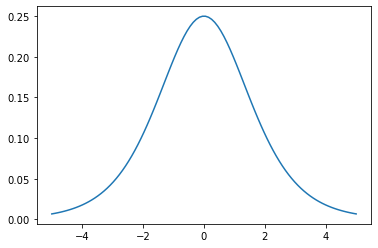

In [30]:
from scipy.stats import logistic
x = np.linspace(-5,5,100)
y = logistic.pdf(x)
plt.plot(x,y)
pass